In [ ]:
from mpl_toolkits.mplot3d import Axes3D

import math
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation

plt.style.use('dark_background')

class SA(object):
  def __init__(self, n, temp = -1, alpha = -1, stoppingTemp = -1, stoppingIter = -1):
    self.n = n
    self.coords = []

    # Initialising nodes as points in a 100 x 100 grid.
    for i in range(n):
      x = 100 * random.random()
      y = 100 * random.random()
      z = 100 * random.random()
      self.coords.append((x, y, z))

    self.temp = math.sqrt(self.n) if temp == -1 else temp
    self.alpha = 0.995 if alpha == -1 else alpha

    self.stoppingTemp = 1e-8 if stoppingTemp == -1 else stoppingTemp
    self.stoppingIter = 100000 if stoppingIter == -1 else stoppingIter
    self.iteration = 1
    
    self.nodes = [i for i in range(self.n)]

    self.bestSolution = None
    self.bestValue = float("Inf")
    self.valueList = []
    self.solutionList = []

  def distance(self, x, y):
    # Euclidean distance between two nodes.
    cx, cy = self.coords[x], self.coords[y]
    return math.sqrt((cx[0] - cy[0]) ** 2 + (cx[1] - cy[1]) ** 2 + (cx[2] - cy[2]) ** 2)

  # Sum of paths taken in a given order of visits.
  def computeValue(self, permutation):
    res = 0
    for i in range(self.n):
      res += self.distance(permutation[i % self.n], permutation[(i + 1) % self.n])
    return res

  # Probability acceptance function (Metropolis - Hastings)
  def p(self, candidateValue):
    if (candidateValue < self.curValue):
      return 1
    else:
      return math.exp(-abs(candidateValue - self.curValue) / self.temp)
  
  def anneal(self):
    # Initializing with the identity permutation.
    self.curSolution = [i for i in range(self.n)]
    self.curValue = self.computeValue(self.curSolution)
    
    self.solutionList.append(self.curSolution)

    # Start annealing!
    while self.temp >= self.stoppingTemp and self.iteration < self.stoppingIter:
      candidateSolution = list(self.curSolution)

      # We reverse a subarray of the visiting order (2 - opt).
      l = random.randint(2, self.n - 1)
      i = random.randint(0, self.n - l)

      candidateSolution[i : (i + l)] = reversed(candidateSolution[i : (i + l)])
      candidateValue = self.computeValue(candidateSolution)

      if (candidateValue < self.bestValue):
        self.bestValue, self.bestSolution = candidateValue, candidateSolution

      if (random.random() < self.p(candidateValue)):
        self.curValue, self.curSolution = candidateValue, candidateSolution

      self.temp *= self.alpha
      self.iteration += 1

      self.valueList.append(self.curValue)
      self.solutionList.append(self.curSolution)

    print("Best value obtained: ", self.bestValue)
    improvement = 100 * (self.valueList[0] - self.bestValue) / (self.valueList[0])

  def createAnimation(self, f):
    fig = plt.figure()
    ax = Axes3D(fig)

    paths, points = self.solutionList, self.coords

    def animate(i):
      x, y, z = [], [], []
      for j in paths[(len(paths) // f) * i]:
        x.append(points[j][0])
        y.append(points[j][1])
        z.append(points[j][2])

      ax.clear()

      ax.view_init(elev = 10., azim = i * 0.25)
      ax.scatter(x, y, z, marker = 'o', s = 20, c = 'c')
      ax.plot([x[-1], x[0]], [y[-1], y[0]], [z[-1], z[0]], c = 'k', lw = 1)
      for i in range(0, len(x) - 1):
        ax.plot([x[i], x[i + 1]], [y[i], y[i + 1]], [z[i], z[i + 1]], c = 'k', lw = 1)

      return fig,

    anim = animation.FuncAnimation(fig, animate, frames = f, interval = 20, blit = True)
    anim.save('animation.mp4', fps = 30, extra_args = ['-vcodec', 'libx264'])

  def plotLearning(self):
    plt.plot([i for i in range(len(self.valueList))], self.valueList)
    plt.ylabel("Values")
    plt.xlabel("Iterations")
    plt.show()

In [ ]:
x = SA(100)

In [ ]:
x.anneal()

Best value obtained:  2424.2114643185573


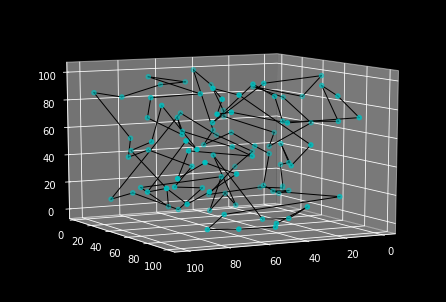

In [ ]:
x.createAnimation(250)

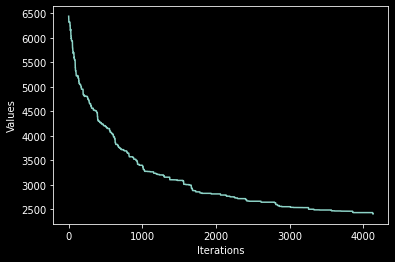

In [ ]:
x.plotLearning()